In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy

In [2]:
data = pd.read_csv('../data/Close.csv').T[1:]
data.index = data.index.astype('datetime64').rename('date')
data = data.astype('float64')
data

,0,1,2,3,4,5,6,7,8,9,...,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.225,22.355,9.3094,10.20,3.4959,9.955,26.66,11.898,9.4832,16.594,...,2.9896,21.90,19.270,12.832,17.76,7.7942,33.864,18.690,303.66,12.231
2010-01-05,20.858,22.589,9.1551,10.25,3.4577,10.022,26.57,11.954,9.5110,16.765,...,3.0673,20.91,19.466,13.234,17.88,7.8400,34.744,18.780,301.20,12.305
2010-01-06,20.612,22.637,9.0008,10.05,3.3339,10.217,26.92,11.594,9.5150,16.779,...,3.0390,20.80,19.570,13.442,16.68,7.8477,35.070,18.890,302.01,12.395
2010-01-07,20.683,22.269,9.0205,10.40,3.5341,10.115,26.50,11.695,9.7720,16.454,...,3.2582,21.65,19.613,13.120,17.52,7.8707,34.599,19.175,292.72,12.345
2010-01-08,21.085,22.192,8.9584,11.35,3.4197,10.149,26.19,11.485,9.8060,16.779,...,3.2016,21.25,19.570,13.106,17.52,7.8785,34.813,19.474,296.55,12.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,48.145,41.828,17.0500,17.78,13.2130,7.550,36.50,16.755,13.7540,11.827,...,5.6688,63.86,50.390,15.642,11.88,15.2490,46.497,27.058,35.70,14.444
2014-12-26,47.930,41.246,17.7340,18.01,13.3830,7.490,36.65,16.391,13.8050,12.041,...,5.6144,65.37,50.634,15.908,11.10,15.3400,45.270,27.326,35.70,14.503
2014-12-29,47.720,41.219,17.8160,18.65,13.2610,7.720,35.46,16.541,13.8980,12.041,...,5.6235,64.10,52.360,15.678,10.80,15.4430,45.854,27.525,34.65,14.463


### Task 0

In [3]:
# pandas
def get_returns(data):
    return (data / data.shift(1))[1:]

In [4]:
# pandas
def correct_wrong_values(data, scale):
    temp = np.array(get_returns(data)).T
    err_coord_low = np.where(temp <= (1 / scale))
    err_coord_high = np.where(temp >= scale)
    for i in range(len(err_coord_low[0])):
        id_low_0 = err_coord_low[0][i]
        id_low_1 = err_coord_low[1][i]
        
        id_high_0 = err_coord_high[0][i]
        id_high_1 = err_coord_high[1][i]

        if 0.5 < data[id_high_0][id_low_1] / data[id_high_0][id_high_1 + 1] < 2:        # if the price has dropped
            data[id_high_0][id_high_1] = data[id_high_0][id_high_1 + 1]

        if 0.5 < data[id_high_0][id_high_1] / data[id_high_0][id_low_1 + 1] < 2:        # If the price went up
            data[id_high_0][id_low_1] = data[id_high_0][id_low_1 + 1]
    return pd.DataFrame(data)

##### test 

In [5]:
scale = 9
print(np.where(get_returns(data) >= scale)[0])
print(np.where(get_returns(data) >= scale)[1])
print('correct wrong values')
data = correct_wrong_values(data, scale)
print(np.where(get_returns(data) >= scale)[0])
print(np.where(get_returns(data) >= scale)[1])

[ 154  177  255  273  305  566  679  747  855  901  903  982 1046]
[1528  592  569  772 1657 1315  185  592 1805  178 2313 2144  565]
correct wrong values
[254 272]
[569 772]


In [6]:
data_returns = get_returns(data)
data_returns.to_csv('../data/data_returns.csv')

### Task 1

In [7]:
# numpy
def neutralize(alpha):
    return alpha - np.mean(alpha)

##### test

In [8]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('neutralize')
print(sum(neutralize(alpha)))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
neutralize
0.0


### Task 2

In [9]:
def normalize(alpha):
    return alpha / np.sum(np.abs(alpha))

test

In [10]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('normalize')
print(sum(normalize(np.abs(alpha))))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
normalize
1.0


### Task 3

In [11]:
def truncate(alpha, max_weight, coef):
    signs = (alpha / np.abs(alpha))
    alpha[np.abs(alpha) > max_weight * coef] = max_weight * coef
    alpha = alpha * signs
    return alpha

In [12]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
coef = 0.9
max_weight = 9
print(alpha)
print('truncate')
print(truncate(alpha, max_weight, coef))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
truncate
[-8.1  3.1  2.   8.1  4.   5.   6.   7.   8.1]


### Task 4

In [13]:
# pandas
def get_returns(data):
    return (data / data.shift(1))[1:]

### Task 5

In [14]:
def ranking(alpha):
    alpha = scipy.stats.rankdata(alpha, method='ordinal') / (len(alpha) - 1)
    return alpha

In [15]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10])
print(alpha)
print('ranking')
print(ranking(alpha))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10. ]
ranking
[0.125 0.375 0.25  1.    0.5   0.625 0.75  0.875 1.125]


### Task 6

In [16]:
def cut_outliers(alpha, coef):
    alpha[alpha < np.quantile(alpha, coef)] = 0
    alpha[alpha > np.quantile(alpha, 1 - coef)] = 0
    return alpha

##### test


In [17]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
coef = 0.01
print(alpha)
print('cut_outliers')
print(cut_outliers(alpha, coef))

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
cut_outliers
[ 0.   3.1  2.  10.   4.   5.   6.   7.  10.   0. ]


### Task 7


In [18]:
def cut_middle(alpha, eps):
    alpha[(alpha <= np.mean(alpha) + eps) & (alpha >= np.mean(alpha) - eps)] = 0
    return alpha

In [19]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
print(alpha)
eps = 1
print('cut_middle')
cut_middle(alpha, eps)
print(alpha)

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
cut_middle
[-11.    3.1   2.   10.    0.    0.    6.    7.   10.   12. ]


### Task 8

In [20]:
def apply_function(alpha, func):
    new_func = np.vectorize(func)
    return new_func(alpha)

test

In [21]:
def test_func_1(value):
    return np.log(np.sqrt(np.abs(value)) + 1) / np.pi

In [22]:
def test_func_2(value):
    if np.abs(value) > 0.1:
        return value * 0.9
    return value

In [23]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
sign = alpha / abs(alpha)
print(alpha)
alpha = apply_function(alpha, test_func_1)
print(sign * (np.exp((alpha * np.pi)) - 1) ** 2)

[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]
[-11.    3.1   2.   10.    4.    5.    6.    7.   10.   12. ]


In [24]:
alpha = np.array([-11, 3.1, 2, 10, 4, 5, 6, 7, 10, 12])
alpha = normalize(alpha)
print(alpha)
print('apply_function')
print(alpha - apply_function(alpha, test_func_2))

[-0.15691869  0.04422254  0.02853067  0.14265335  0.05706134  0.07132668
  0.08559201  0.09985735  0.14265335  0.17118402]
apply_function
[-0.01569187  0.          0.          0.01426534  0.          0.
  0.          0.          0.01426534  0.0171184 ]


### Task 9

In [25]:
def turnover(alphas, option=0):
    turnover_days = abs(alphas.diff(periods=1)).sum(axis=1)
    if option == 1:
        return turnover_days
    return turnover_days.groupby(alphas.index.year).mean()

test

In [26]:
def algh_alpha_reversion(data):
    alpha = -(data_returns - 1)
    alpha = alpha.T.apply(neutralize).apply(normalize).T
    alpha
    return alpha

In [27]:
alpha_revers = algh_alpha_reversion(data)
print('turnover')
print('mean_year:', '\n', turnover(alpha_revers))
print('days:', '\n', turnover(alpha_revers, option=1))

turnover
mean_year: 
 date
2010    1.444863
2011    1.449658
2012    1.453622
2013    1.455584
2014    1.451279
dtype: float64
days: 
 date
2010-01-05    0.000000
2010-01-06    1.214469
2010-01-07    1.490863
2010-01-08    1.435943
2010-01-11    1.378888
                ...   
2014-12-24    1.588333
2014-12-26    1.355891
2014-12-29    1.491086
2014-12-30    1.470270
2014-12-31    1.418456
Length: 1256, dtype: float64


### Task 11

In [28]:
def get_returns_for_pnl(data):
    return (data / data.shift(1))[2:]

In [29]:
def get_pnl(returns, alpha, option=0):
    pnl = alpha.reset_index(drop=True).mul(returns.reset_index(drop=True), axis=0).sum(axis=1)
    ans = pd.DataFrame()
    ans['pnl'] = pnl
    ans = ans.set_index(alpha.index)
    if option == 1:
        return ans.set_index(alpha.index).groupby(alpha.index.year).sum()
    return ans

In [30]:
#returns = pd.read_csv('../data/data_returns.csv', index_col='date').iloc[1:, :]
#returns.index = returns.index.astype('datetime64').rename('date')

returns = get_returns_for_pnl(data)
years_pnl_cum = get_pnl(returns, alpha_revers, 1)
days_pnl = get_pnl(returns, alpha_revers)

print('years pnl cum:', '\n', years_pnl_cum)
print()
print('days pnl:', '\n', days_pnl)

years pnl cum: 
            pnl
date          
2010  0.286148
2011  0.215693
2012  0.172271
2013  0.110274
2014  0.066643

days pnl: 
                  pnl
date                
2010-01-05 -0.007095
2010-01-06 -0.001226
2010-01-07 -0.003690
2010-01-08 -0.004384
2010-01-11  0.000480
...              ...
2014-12-24 -0.005891
2014-12-26  0.003743
2014-12-29  0.002756
2014-12-30  0.000606
2014-12-31  0.000000

[1256 rows x 1 columns]


### Task 12

In [31]:
def get_sharpe_coef(returns):
    return np.sqrt(len(returns) - 1) * np.mean(returns) / np.std(returns)

test

In [32]:
days_pnl = get_pnl(returns, alpha_revers)
coef_sharpe = get_sharpe_coef(days_pnl['pnl'])
coef_sharpe

5.510708542576269

### Task 15

In [33]:
def corr_btw_alphas(alpha_1, alpha_2):
    return scipy.stats.pearsonr(alpha_1, alpha_2)

In [34]:
alpha_1 = np.random.rand(10)
alpha_2 = np.random.rand(10)
print(corr_btw_alphas(alpha_1, alpha_2))
alpha_3 = [1, 2, 3, 4, 5]
alpha_4 = [2, 3, 4, 5, 7]
print(corr_btw_alphas(alpha_3, alpha_4))


PearsonRResult(statistic=0.1050988677794472, pvalue=0.7726189054497893)
PearsonRResult(statistic=0.9863939238321437, pvalue=0.0019012746601963688)


### anything

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


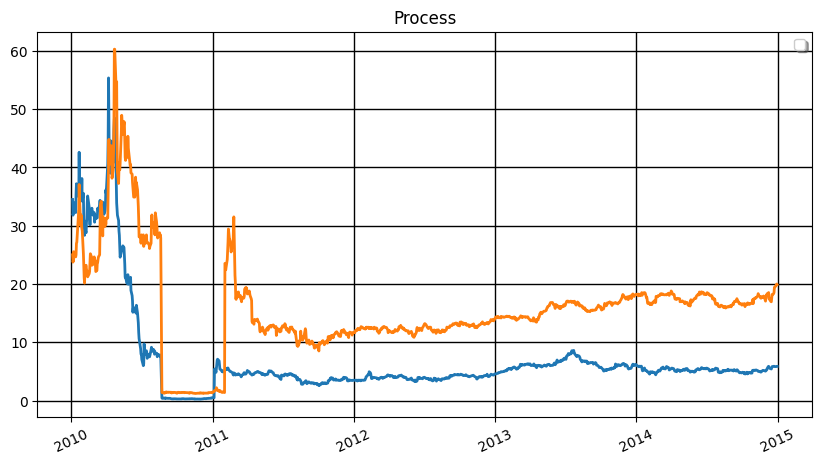

In [35]:
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots()
ax.plot()
ax.plot(data[569], linewidth=2, label='')
ax.plot(data[772], linewidth=2, label='')

ax.grid(color = 'black', linewidth = 1, linestyle = '-')    
plt.legend(loc = 'best', fancybox = True, shadow = True)


#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(250))  # интервал написания значений оси OX
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))  # интервал написания значений оси OY

plt.xticks(rotation=25)

fig.set_figwidth(10)
fig.set_figheight(5)

plt.title(f'Process')
plt.show()